**SENTIMENT ANALYSIS ON AMAZON ELECTRONIC PRODUCTS**

In [98]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree

In [8]:
# Specify the path to your CSV file
csv_file_path = "Amazon Reviews 1.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

C:\Users\andre\AppData\Local\Temp\ipykernel_27452\3612977657.py:5: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


In [9]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [10]:
print( f'Shape of the dataset: ', df.shape )

Shape of the dataset:  (34660, 21)


In [11]:
#Now, let's see what are the columns in our database:

print ( f'Number of features in our dataset: ', len( df.columns ) )
print( '\n' )

for column in df.columns:
    print( column )

Number of features in our dataset:  21


id
name
asins
brand
categories
keys
manufacturer
reviews.date
reviews.dateAdded
reviews.dateSeen
reviews.didPurchase
reviews.doRecommend
reviews.id
reviews.numHelpful
reviews.rating
reviews.sourceURLs
reviews.text
reviews.title
reviews.userCity
reviews.userProvince
reviews.username


!Here we are planning on describing each feature like in the Titanic lab, but we are waiting for the Kaggle link in case there is already a description which would make it easier!

In [12]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [13]:
amazon_categorical = []
amazon_numerical = []

for column in df.columns:
    if df[column].dtype == 'object':
        amazon_categorical.append(column )
    else:
        amazon_numerical.append(column )  
        
print( f'Number of categorical features: ', len(amazon_categorical) )
print ( '\n' )
        
print ( amazon_categorical )

Number of categorical features:  16


['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username']


In [14]:
print( f'Number of numerical features: ', len(amazon_numerical) )
print ( '\n' )

print ( amazon_numerical )

Number of numerical features:  5


['reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.userCity', 'reviews.userProvince']


Now, we want to look for features which contain $blank$ , $NULL$ or $empty$ values.

In [15]:
amazon_features_blank = []

for features in df.isnull():
    if df[features].isnull().sum() > 0:
        amazon_features_blank.append(features)
        print( features, '\n', df[features].isnull().sum() )
        
print( '\n' )        
print( f'Number of features that contain blank, null or empty values is: ', len(amazon_features_blank) )
print( '\n' )
print ( amazon_features_blank )

name 
 6760
asins 
 2
reviews.date 
 39
reviews.dateAdded 
 10621
reviews.didPurchase 
 34659
reviews.doRecommend 
 594
reviews.id 
 34659
reviews.numHelpful 
 529
reviews.rating 
 33
reviews.text 
 1
reviews.title 
 5
reviews.userCity 
 34660
reviews.userProvince 
 34660
reviews.username 
 2


Number of features that contain blank, null or empty values is:  14


['name', 'asins', 'reviews.date', 'reviews.dateAdded', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username']


Let's drop the completely(or almost) empty columns:

In [95]:
df = df.drop( columns = [ 'reviews.id', 'reviews.didPurchase', 'reviews.userCity', 'reviews.userProvince' ] )

In [37]:
#Here, we replace the null values in the reviews and they titles by empty string

df['reviews.text'].fillna('', inplace = True)
df['reviews.title'].fillna('', inplace = True)

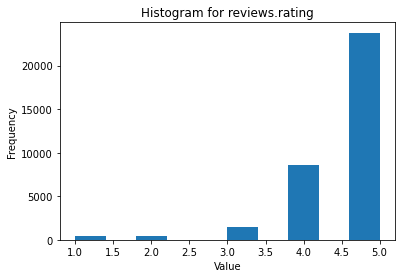

In [17]:
plt.hist( df['reviews.rating'])
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Histogram for reviews.rating' )
plt.show()

In [18]:
product_counts = df[ 'asins' ].value_counts()

product_counts

B018Y229OU               10966
B00L9EPT8O,B01E6AO69U     6619
B00U3FPN4U                5056
B00OQVZDJM                3176
B01AHB9CN2                2814
B018Y23MNM                1685
B018Y225IA                1038
B01BH83OOM                 636
B00IOY8XWQ                 580
B01J2G4VBG                 402
B00TSUGXKE                 372
B018SZT3BK                 270
B0189XYY0Q                 256
B00ZV9PXP2                 212
B01AHB9CYG                 158
B00QFQRELG                  73
B00VINDBJK                  67
B00IOYAM4I                  51
B01BFIBRIE                  30
B00QJDU3KY                  19
B002Y27P3M                  19
B01J4ORNHU                  16
B00QL1ZN3G                  15
B01AHB9C1E                  14
B006GWO5WK                  13
B00LW9XOJM                  13
B002Y27P6Y                  10
B018Y22BI4                  10
B006GWO5NE                   8
B00UH4D8G2                   8
B00X4WHP5E                   7
B018T075DC                   7
B018Y22C

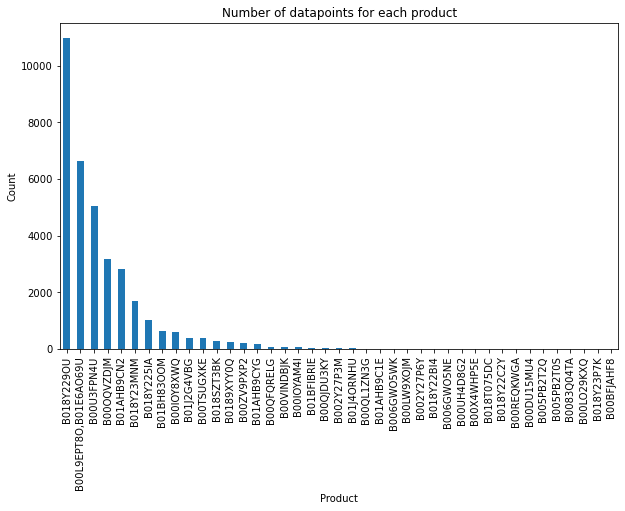

In [19]:
plt.figure( figsize = (10, 6) )
product_counts.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Number of datapoints for each product') 
plt.show()

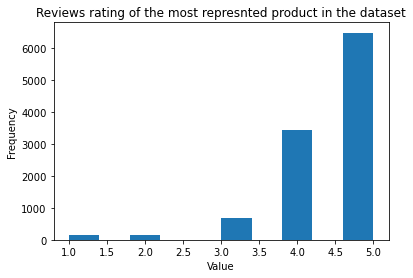

In [20]:
filtered_df = df[ df['asins'] == 'B018Y229OU' ]

plt.hist( filtered_df['reviews.rating'])
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Reviews rating of the most represnted product in the dataset' )
plt.show()

In [21]:
overall_grade = filtered_df['reviews.rating'].mean()
print( overall_grade )

4.454222141163597



**CLEANING THE DATASET: REMOVING PUNCTUATION FROM REVIEWS**


In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
translator = str.maketrans('', '', string.punctuation)

df['reviews.text'] = df['reviews.text'].apply(lambda x: str(x).translate(translator) if pd.notnull(x) else x )
    
print( df['reviews.text'][0])

This product so far has not disappointed My children love to use it and I like the ability to monitor control what content they see with ease


In [29]:
translator = str.maketrans('', '', string.punctuation)

df['reviews.title'] = df['reviews.title'].apply(lambda x: str(x).translate(translator) if pd.notnull(x) else x )
    
print( df['reviews.title'][2])

Beginner tablet for our 9 year old son


In [40]:
df['length_review'] = df['reviews.text'].apply(len)

for i in df['length_review']:
    print(i)

141
74
125
584
606
206
110
129
260
54
51
83
139
61
51
77
59
159
61
307
109
160
81
219
166
90
84
163
49
96
48
92
63
143
60
100
61
70
53
57
403
72
68
121
55
111
128
65
51
132
123
102
410
54
106
88
67
423
54
57
230
86
83
73
111
98
76
143
86
49
85
82
65
67
86
212
79
168
57
63
88
104
387
474
74
310
84
327
403
935
87
55
773
47
53
143
55
300
130
125
146
75
75
242
46
74
66
52
57
64
82
484
160
121
291
228
144
97
76
70
46
168
82
72
95
176
1030
65
215
59
528
70
131
129
61
333
63
45
322
249
66
142
56
126
110
86
88
87
143
156
207
304
117
770
126
307
147
84
61
132
125
108
94
105
51
64
102
91
240
120
81
51
83
51
67
631
220
105
104
96
82
114
227
72
67
60
70
56
61
82
489
428
264
202
239
72
51
55
94
224
161
73
82
120
83
55
259
127
118
99
71
123
109
53
71
51
82
227
53
77
47
963
176
94
443
95
213
69
55
62
214
54
96
75
122
107
73
97
119
101
63
49
190
124
176
339
87
72
86
236
49
79
145
391
119
335
289
148
63
445
113
63
106
68
199
356
82
485
50
79
195
222
120
190
73
86
73
185
65
76
51
67
210
126
89
72
131
72

170
157
108
264
71
52
264
261
257
253
85
371
172
118
138
212
220
324
129
49
60
57
69
60
72
74
60
180
147
151
50
322
60
76
565
63
359
62
125
159
194
123
51
162
102
52
268
94
327
617
209
9
51
61
97
49
54
81
63
192
61
133
116
110
65
89
84
54
209
70
56
62
534
56
52
236
57
103
103
59
119
144
104
68
131
63
66
93
58
97
79
164
76
353
213
64
120
79
69
116
48
84
75
181
53
153
63
73
63
81
77
51
75
481
197
86
861
954
114
100
70
455
209
107
141
407
86
70
59
409
68
356
149
84
400
110
82
69
92
61
115
285
75
53
70
55
124
57
52
61
552
60
172
87
106
86
214
142
66
77
79
163
130
268
190
66
63
63
76
233
47
75
240
74
145
58
225
71
77
97
239
119
69
63
123
194
62
73
141
90
118
48
184
99
99
77
358
94
324
235
76
316
265
159
50
54
52
252
155
74
71
129
77
168
66
79
210
125
120
94
70
90
93
84
101
108
276
60
108
143
129
172
64
83
54
199
51
58
106
113
143
52
122
53
126
99
125
124
54
163
78
122
214
150
195
118
83
68
70
76
146
149
141
56
109
123
64
76
94
58
931
64
64
90
217
132
187
314
157
56
72
68
84
116
75
83
69
115

52
87
187
73
97
49
99
61
175
61
100
137
58
109
66
201
84
41
108
179
277
132
168
54
159
941
66
170
182
66
348
188
85
53
64
142
208
222
160
52
72
58
319
278
55
57
228
178
50
209
69
142
49
156
48
111
424
204
60
124
116
306
159
191
270
164
51
118
50
192
239
61
148
108
154
128
67
144
99
158
133
55
68
127
54
52
48
55
50
74
131
61
170
66
95
117
52
591
101
526
123
90
107
62
182
169
164
62
92
69
51
53
112
56
47
101
138
82
52
63
235
110
61
148
61
59
76
345
162
111
254
85
85
143
440
372
54
82
88
74
58
61
42
61
117
70
49
161
360
121
72
56
80
127
66
98
320
50
363
148
341
78
49
59
82
19
221
505
50
57
423
57
79
130
218
241
72
300
66
249
83
116
96
219
107
67
897
58
121
116
89
59
324
100
182
284
66
92
58
77
95
220
51
1041
89
131
259
104
146
84
52
71
60
71
54
192
58
77
190
63
110
64
61
71
66
78
85
257
57
154
108
202
74
165
94
273
135
73
59
113
138
138
260
63
99
100
128
265
850
117
152
293
151
102
69
222
246
50
59
123
252
335
95
197
309
258
111
418
135
85
170
97
65
48
109
55
162
51
92
127
184
239
244
125

95
250
389
153
74
73
71
100
68
83
53
85
74
420
141
47
101
66
54
69
50
107
141
118
109
68
158
92
88
112
69
146
177
205
49
142
51
50
59
242
45
213
59
118
81
53
54
687
47
78
62
264
138
98
111
101
51
82
263
83
81
109
170
37
65
52
63
54
94
357
71
63
55
120
62
144
77
46
100
120
71
177
224
120
91
103
118
303
275
139
128
151
84
55
82
50
63
56
142
54
57
161
155
164
60
145
61
105
91
95
346
53
286
347
59
98
71
114
116
93
71
117
64
202
99
101
59
86
69
150
57
58
53
70
55
109
68
106
51
199
129
59
148
51
47
63
63
156
57
62
198
82
54
107
84
169
318
314
224
235
127
129
275
67
117
66
189
87
87
113
99
140
74
140
75
94
239
129
64
147
65
55
131
134
78
65
314
101
106
146
58
119
89
166
404
74
152
104
54
54
56
102
60
81
169
124
67
126
152
59
71
53
78
71
45
46
55
218
81
59
188
60
51
198
49
113
91
246
403
83
94
73
92
56
148
309
62
101
72
66
118
53
60
62
51
207
93
54
69
52
101
72
83
52
529
75
120
61
258
74
60
54
260
145
63
178
479
141
82
57
60
59
71
62
68
250
76
61
64
219
198
70
63
66
55
92
54
61
84
174
51
53
32

152
122
56
317
58
50
96
67
108
108
52
138
76
64
122
70
56
60
45
142
81
80
164
59
57
229
189
146
145
52
76
203
63
148
88
48
738
189
139
64
99
54
163
50
82
136
247
63
60
134
117
60
57
56
67
47
88
77
328
146
145
152
66
67
74
250
147
148
215
228
351
75
77
182
97
54
52
209
61
53
100
89
51
48
75
130
180
226
48
298
224
88
122
91
204
139
218
174
76
51
77
58
97
48
199
63
60
74
177
96
49
53
154
48
84
106
45
50
110
69
108
118
108
87
99
72
344
135
76
171
57
131
54
107
96
423
297
117
259
360
48
155
71
170
106
315
95
135
245
113
87
118
60
59
220
51
52
451
50
148
392
348
140
245
92
65
144
63
515
108
55
61
133
56
107
98
158
116
175
77
72
78
60
174
110
75
62
80
116
81
98
69
168
199
164
55
79
84
125
128
372
769
178
60
225
183
159
116
145
236
234
76
235
159
107
106
96
108
90
63
62
240
114
121
62
230
180
54
117
56
98
132
53
47
77
157
214
512
74
96
68
229
68
286
150
324
146
143
678
50
55
60
113
72
49
186
998
108
204
244
641
54
52
529
56
267
204
97
147
63
183
104
412
51
120
251
263
97
152
138
98
369
293
58


70
143
77
113
99
60
161
152
71
52
90
395
106
117
56
302
50
91
47
178
56
64
167
270
109
53
495
100
70
148
127
81
71
330
60
76
63
87
55
63
77
62
122
119
51
164
221
172
372
105
191
152
86
147
119
119
50
98
137
52
50
76
56
57
147
57
67
1668
210
180
363
45
207
127
139
57
62
83
249
81
53
210
71
111
72
107
239
104
201
60
61
301
199
96
51
60
68
238
52
63
83
84
128
64
109
281
108
91
60
91
107
79
91
144
60
87
56
295
62
65
55
53
124
57
492
354
181
208
109
101
92
125
198
186
55
115
88
51
193
59
96
123
55
52
336
63
304
78
202
68
116
62
88
256
175
90
223
103
151
91
199
195
208
51
247
85
1033
62
184
96
60
292
72
58
106
163
133
64
210
106
97
125
63
71
99
76
161
67
106
218
60
80
463
51
79
116
131
81
304
88
437
127
75
86
227
50
335
50
70
68
97
60
60
134
80
206
63
87
192
58
150
75
97
164
67
138
300
68
186
63
50
92
52
235
211
130
133
57
101
63
86
300
102
93
51
242
233
101
50
120
596
160
115
165
106
62
321
121
88
93
199
178
67
60
59
91
98
47
52
55
112
131
157
329
273
134
62
62
68
356
119
72
105
63
89
111
7

104
76
97
108
100
50
64
83
62
77
155
58
55
62
52
101
82
94
48
166
69
93
48
314
117
100
129
137
446
58
314
65
111
62
285
142
171
58
165
53
80
153
54
74
237
85
64
115
110
153
65
84
50
102
105
56
104
50
67
46
62
89
131
79
119
86
102
66
128
363
166
92
508
53
54
146
112
66
49
178
74
51
31
233
91
93
704
60
64
106
61
63
124
150
197
122
56
170
559
116
61
109
155
164
106
117
390
62
131
527
69
53
57
75
109
83
150
62
131
51
384
66
49
179
57
102
50
206
51
90
57
55
53
194
49
52
147
310
57
87
48
46
86
68
119
274
172
81
105
323
67
105
85
104
560
52
104
184
420
147
88
49
79
68
54
53
121
58
210
98
129
86
109
73
62
96
132
72
153
176
54
50
912
64
104
150
99
87
54
213
52
740
190
310
192
184
457
50
61
79
58
150
63
85
52
114
159
82
187
53
93
49
347
92
51
93
56
114
64
123
111
98
318
75
80
55
98
64
291
178
49
68
85
201
257
63
76
73
73
94
96
52
127
63
319
63
67
95
87
140
75
292
70
319
59
99
307
112
176
142
55
190
94
72
52
56
71
254
97
140
42
58
108
172
101
50
286
55
375
254
169
151
87
92
126
550
217
280
83
61


65
186
165
98
93
857
81
284
89
195
72
62
266
74
66
201
80
181
88
82
312
149
604
157
171
259
104
302
78
183
50
50
288
214
188
320
176
108
163
548
83
82
51
198
40
293
198
179
169
133
54
85
375
147
205
147
1173
55
113
59
196
83
275
160
246
89
67
81
76
159
196
288
135
89
52
141
208
120
75
168
133
91
225
345
117
139
71
88
50
58
55
179
77
61
106
483
180
141
107
136
269
219
97
57
81
163
129
195
68
68
131
206
248
70
256
75
117
267
58
378
288
138
118
157
64
125
60
72
230
227
109
82
47
91
101
70
165
54
513
269
104
141
61
73
66
62
55
88
304
144
72
85
560
141
52
80
340
172
251
71
371
100
146
78
62
125
89
63
116
199
98
413
327
91
402
312
372
231
82
103
48
753
62
62
174
411
466
111
734
146
72
156
339
93
364
257
93
285
265
97
337
51
305
54
275
133
79
53
135
290
275
53
54
72
82
450
68
72
167
161
150
445
52
104
148
232
167
49
88
87
119
248
86
382
234
310
69
66
111
134
106
174
187
80
98
715
70
183
81
67
102
71
170
90
473
171
50
290
65
94
73
198
165
132
226
264
263
51
54
57
110
188
62
135
65
163
49
51
68

964
142
55
67
273
114
121
51
105
53
57
112
177
74
315
139
50
233
64
56
51
60
60
207
133
154
150
92
73
92
227
563
55
118
260
246
85
336
64
57
259
164
165
157
274
88
117
176
225
157
52
235
93
256
97
68
708
35
54
70
95
387
59
58
151
79
55
61
49
66
121
93
65
98
118
66
254
105
71
202
82
142
78
214
389
286
90
124
90
76
662
141
227
126
1104
319
114
76
75
68
70
113
135
83
726
93
96
203
491
118
374
204
162
73
54
81
166
233
91
587
146
109
82
156
63
214
183
60
62
111
89
178
141
208
54
188
91
58
402
150
196
273
164
108
106
215
134
80
69
71
116
133
91
110
56
135
86
81
87
65
53
136
80
252
191
173
81
236
105
107
334
76
161
57
333
525
96
72
111
69
226
169
295
698
240
80
195
119
199
58
113
96
93
83
86
143
220
90
156
54
150
710
74
210
103
80
56
102
188
211
49
137
131
275
167
109
94
61
102
130
59
66
163
124
69
113
116
186
84
56
344
50
368
359
87
124
135
92
113
59
123
83
91
395
114
198
107
74
57
300
111
145
184
173
166
168
82
80
108
127
266
283
115
104
120
208
94
323
221
281
58
101
52
217
110
399
52
391
6

167
218
56
55
886
71
102
91
139
518
54
62
182
54
284
48
126
55
79
357
63
206
59
108
135
317
189
360
148
137
55
70
70
138
146
84
95
98
62
176
118
49
192
109
152
70
56
58
278
191
157
84
211
55
166
69
92
155
88
69
95
120
78
87
86
60
63
72
68
125
52
169
146
91
92
56
141
68
56
59
69
154
391
176
189
95
119
373
213
49
217
308
259
165
300
282
165
92
118
147
134
62
455
118
76
98
106
98
93
183
242
128
488
64
240
110
137
103
98
55
72
123
77
116
117
77
59
144
139
51
113
146
93
326
55
92
94
189
56
55
198
154
222
71
90
186
236
58
444
104
445
117
62
282
99
144
282
1029
366
263
71
142
332
366
279
659
259
62
56
100
50
63
152
180
176
58
114
82
216
66
115
47
183
177
125
66
74
87
156
133
789
81
74
109
117
74
124
52
119
165
60
208
62
106
50
55
61
132
81
47
105
107
136
136
132
366
90
144
153
200
234
63
101
168
508
206
274
90
318
72
67
260
72
100
115
108
48
77
93
81
49
74
114
213
138
196
170
228
165
79
53
52
95
116
125
74
1523
406
298
119
172
71
74
65
82
144
203
339
122
143
104
53
146
101
148
513
151
59
68
9

121
84
65
62
179
515
156
90
59
183
212
52
107
58
101
148
104
164
58
162
99
53
51
121
58
47
63
63
345
74
346
463
135
136
71
243
49
64
240
200
79
53
197
244
823
140
172
130
55
225
102
101
62
117
56
155
206
59
116
229
245
281
123
81
52
94
88
83
53
275
66
182
49
58
61
97
90
134
297
154
471
117
173
161
57
53
57
183
198
166
98
538
51
87
207
97
88
132
61
156
126
51
159
105
141
180
389
1241
61
370
85
150
330
95
52
63
143
318
357
402
52
93
58
79
266
83
123
53
143
194
77
88
61
353
71
56
50
178
113
142
187
119
100
72
66
58
251
237
64
148
54
59
96
93
347
71
295
222
122
108
148
190
163
91
333
90
55
99
72
77
64
155
105
199
81
119
90
215
179
144
128
151
256
70
170
215
82
50
56
351
315
168
287
92
77
155
176
107
781
90
204
239
75
188
120
47
70
90
323
72
136
259
81
108
103
242
61
254
173
445
64
380
113
69
149
69
297
100
82
60
59
70
92
213
108
384
56
102
83
89
93
131
616
192
263
135
189
73
222
113
67
951
293
133
49
265
84
83
71
187
91
130
133
111
118
114
73
74
168
82
118
116
190
79
61
151
61
280
99
226
4

337
254
133
93
583
300
433
280
148
194
231
143
389
215
54
104
290
161
171
769
195
120
252
56
90
109
109
292
69
636
122
309
90
156
99
89
78
1065
141
68
71
184
83
79
117
320
158
280
61
279
120
111
82
92
63
736
477
1539
192
104
131
120
153
455
53
231
89
563
66
71
115
193
360
96
131
301
53
49
337
50
170
176
153
60
295
308
304
60
81
97
295
61
231
265
117
102
110
143
132
193
1575
209
159
283
132
59
348
137
97
199
64
12
66
50
110
100
286
247
47
77
101
54
271
50
89
105
81
572
135
783
605
93
119
111
440
183
78
110
208
684
78
897
219
106
194
94
101
340
51
83
65
106
414
801
440
446
161
100
95
109
160
352
278
53
578
222
203
330
153
87
98
112
109
143
1227
296
50
214
557
181
86
694
1783
346
132
144
83
176
101
74
110
51
94
193
137
167
83
223
137
215
137
50
49
100
128
278
102
198
422
60
136
102
97
249
127
104
116
204
704
77
155
96
175
62
746
62
114
483
50
57
174
517
142
160
109
215
193
159
347
54
107
503
146
158
45
93
92
77
92
156
89
195
92
635
76
55
127
147
122
75
108
121
241
57
68
153
140
53
67
294


76
61
93
257
58
679
56
106
99
86
70
131
77
64
61
80
52
55
206
58
64
47
77
209
50
103
270
117
75
230
113
185
75
48
86
53
142
357
73
89
205
89
158
176
110
83
114
68
105
281
98
796
146
64
63
70
75
64
270
346
88
72
84
52
81
76
68
74
109
117
124
237
60
61
67
107
199
52
87
163
456
66
50
68
318
135
68
317
53
303
91
50
188
64
252
191
242
594
461
238
101
67
52
401
51
166
81
271
109
55
50
118
480
80
100
561
183
51
59
91
119
85
64
75
94
126
189
291
68
145
170
96
89
296
53
76
247
133
70
105
317
352
60
148
51
58
220
298
80
71
75
266
191
385
354
290
73
151
62
159
119
72
56
104
73
629
165
67
50
66
66
237
76
79
76
86
257
55
94
49
97
230
166
58
47
120
64
48
61
154
49
233
91
84
156
88
104
190
153
114
63
54
55
83
463
88
633
181
75
59
198
280
70
168
77
107
48
51
111
114
62
119
66
54
114
86
75
111
57
135
60
364
54
56
63
66
123
104
276
107
82
54
48
199
58
61
65
432
80
77
127
201
220
59
69
66
48
51
188
52
112
53
69
114
59
117
386
125
47
110
69
114
56
215
87
43
13
49
193
95
68
73
228
141
69
55
55
230
55
249
9

231
59
204
375
217
73
206
226
312
332
138
270
174
786
161
310
312
131
130
144
74
403
128
127
252
259
164
88
74
182
89
60
62
54
560
67
96
83
65
171
56
77
105
63
96
55
69
181
245
192
74
150
57
148
64
419
752
50
51
63
51
196
65
821
122
54
120
58
68
85
136
117
102
62
57
50
53
59
490
154
50
87
58
20
183
214
50
220
126
69
75
56
268
64
110
81
112
61
148
61
516
60
228
103
84
115
102
51
209
168
49
288
61
93
347
62
51
98
315
170
49
83
60
53
75
103
61
60
92
177
63
159
56
94
58
75
964
159
354
67
94
68
105
63
49
70
54
129
187
238
64
90
119
45
145
49
199
80
155
48
62
101
338
405
121
353
71
160
117
112
77
820
188
167
47
68
256
286
87
48
91
113
93
55
318
75
79
86
42
116
77
59
242
190
79
187
73
123
121
204
80
50
111
384
110
46
126
62
1398
58
67
167
105
448
50
46
401
110
179
117
104
50
90
49
55
75
56
188
85
62
107
159
132
57
65
93
54
51
67
92
68
158
66
93
47
68
183
60
184
82
86
88
94
147
210
73
59
65
165
119
53
47
160
115
180
230
50
133
173
95
167
53
180
903
61
69
56
89
70
535
66
56
161
121
77
57
143
67

In [43]:
df['length_title'] = df['reviews.title'].apply(len)

for i in df['length_title']:
     print(i)

6
9
38
4
25
21
20
15
17
28
25
17
11
9
9
22
4
25
20
13
16
18
10
21
34
30
20
43
9
12
43
24
13
22
12
31
13
14
12
5
31
9
19
31
15
25
26
14
11
7
34
26
36
13
16
5
12
31
37
19
35
31
12
23
13
10
17
11
11
18
27
9
12
11
12
18
26
9
23
15
21
43
29
25
14
17
10
7
38
19
22
11
21
7
14
26
13
35
21
11
10
7
10
7
11
16
48
7
50
17
9
16
13
29
26
24
28
12
26
26
15
14
9
18
17
29
17
29
31
17
21
34
16
46
13
18
9
24
49
23
18
24
24
21
7
14
23
5
22
34
18
25
20
43
48
27
12
11
24
7
16
26
1
18
9
4
15
33
29
18
4
6
19
11
18
22
25
26
19
7
24
9
29
10
34
26
6
17
14
19
36
25
27
19
10
13
11
8
15
27
12
28
13
10
44
7
38
12
18
19
21
25
32
20
19
15
11
44
17
12
8
30
14
12
41
14
33
32
11
11
9
12
27
16
28
16
12
32
22
9
12
13
22
7
19
30
21
19
19
19
4
18
15
33
9
26
30
18
18
23
20
22
21
11
12
13
12
17
13
9
29
32
12
26
23
9
12
10
7
12
16
10
13
7
11
2
32
14
9
30
14
5
21
24
20
7
11
30
16
13
26
4
19
11
21
23
12
27
19
35
14
5
19
18
10
10
12
18
12
11
7
24
23
23
18
7
22
18
4
45
34
12
24
46
38
25
17
19
15
30
20
25
13
12
40
17
27
14
21
33
7
1

10
14
12
11
4
5
4
12
12
7
27
29
16
21
14
38
5
16
31
28
32
22
12
23
26
31
16
21
26
25
14
25
43
24
13
16
19
7
16
13
14
15
29
15
13
19
13
7
13
13
48
13
22
11
15
27
6
8
14
27
16
20
18
12
5
37
7
12
28
8
6
21
5
17
36
20
17
33
21
5
12
11
32
30
25
17
14
35
12
17
22
15
47
19
19
40
10
52
67
4
12
27
26
14
21
25
14
24
11
14
11
14
27
46
47
28
18
33
8
39
43
6
9
32
25
4
11
10
12
12
18
27
8
4
36
30
14
14
10
25
24
12
21
18
13
18
16
13
10
24
30
33
30
30
15
27
19
13
14
11
23
12
5
7
31
17
7
18
6
34
18
20
29
11
25
19
12
14
27
22
24
15
25
5
26
15
35
10
29
19
14
43
10
47
41
38
27
36
25
21
14
14
19
24
25
16
25
16
17
11
15
12
21
7
11
18
13
12
16
12
28
12
11
25
12
15
36
18
14
29
19
26
23
14
28
11
13
14
13
23
10
11
14
20
45
7
19
26
12
12
6
14
18
11
13
13
9
8
18
14
20
4
27
10
26
12
11
18
11
22
8
11
31
31
17
29
12
19
11
12
16
24
18
33
34
11
38
23
10
18
7
6
27
10
15
23
4
20
13
4
33
12
50
47
36
14
10
22
14
21
2
21
24
20
12
21
26
2
15
21
11
5
17
37
19
16
13
25
28
21
17
13
11
17
12
18
19
11
14
26
25
20
23
17
21
20
7
2

21
11
23
14
11
7
24
17
22
14
20
32
35
23
20
25
31
16
12
9
10
22
27
18
9
33
18
17
39
13
5
14
13
13
14
31
7
12
11
22
10
4
23
4
22
13
7
24
22
29
9
13
28
14
47
13
12
38
21
38
30
19
20
8
4
15
24
19
11
16
12
11
11
14
14
26
15
33
13
24
12
21
13
16
31
20
16
24
24
4
50
7
11
14
47
42
26
12
39
22
26
26
16
42
17
2
18
18
12
12
18
17
12
36
4
9
25
26
18
11
10
20
9
25
40
14
23
25
15
13
20
39
13
21
12
17
24
12
43
8
10
23
11
49
6
26
39
30
6
14
5
21
15
28
50
18
23
16
12
8
11
18
9
14
35
21
19
4
12
10
14
17
10
32
12
19
11
14
34
17
32
10
41
12
12
18
10
5
15
12
10
16
24
13
12
23
17
50
17
30
27
15
23
7
20
25
19
14
17
17
9
7
11
17
13
13
6
12
23
20
11
45
22
14
21
43
26
35
9
29
18
28
5
32
44
25
13
8
15
21
10
27
13
26
16
12
46
19
7
10
15
17
30
11
14
17
26
3
11
11
7
50
14
12
21
49
12
25
22
28
23
5
22
42
12
25
13
11
22
26
7
5
11
20
20
22
19
15
21
17
32
13
5
11
5
14
13
10
14
12
18
19
5
7
11
32
7
11
10
17
12
34
5
12
20
14
21
11
28
18
19
7
11
27
26
13
25
18
14
20
9
12
20
12
13
18
6
25
11
14
9
33
11
16
12
13
11
12
7
18

14
19
22
9
18
12
20
24
12
28
38
14
11
12
5
12
22
23
31
24
26
23
14
21
17
32
13
9
12
22
50
14
12
27
10
18
37
9
4
18
7
22
22
8
24
29
10
11
13
7
12
16
32
23
19
20
50
15
23
36
24
3
34
12
11
3
10
24
25
13
22
29
25
32
26
11
21
5
11
44
24
11
30
23
23
22
10
25
22
19
20
28
13
18
19
29
12
17
23
10
10
28
14
10
11
28
21
12
24
37
26
29
12
19
12
20
8
21
22
19
20
16
18
19
10
16
14
14
30
14
22
21
25
30
20
25
27
43
49
12
4
11
11
12
22
4
24
7
27
12
17
11
22
11
12
21
33
28
10
15
16
32
24
18
14
13
11
2
25
19
27
30
24
7
12
19
10
30
16
22
26
2
26
38
24
18
5
17
9
17
6
22
16
20
11
32
12
13
19
11
17
10
19
34
16
11
46
33
18
8
17
24
31
12
10
15
14
10
17
5
32
26
12
28
19
4
15
17
21
9
4
36
11
22
34
12
23
40
12
28
48
23
12
4
20
19
7
40
23
26
22
11
11
24
11
7
21
24
9
17
19
13
20
37
12
12
24
14
19
18
24
30
30
26
17
9
12
26
17
21
19
35
23
41
20
21
32
17
24
14
11
47
14
30
48
19
26
5
5
19
25
10
9
23
17
13
31
18
20
21
26
28
20
11
20
30
18
32
25
14
22
18
13
16
14
13
7
4
22
21
26
19
5
25
12
12
9
7
14
12
12
19
16
32
19
21
2

16
18
16
12
16
25
45
14
18
8
47
4
32
14
7
16
23
27
32
28
18
44
11
30
15
17
20
9
3
7
8
20
5
30
10
13
28
12
20
24
14
21
12
10
10
50
8
15
18
11
27
12
12
7
21
23
16
15
23
43
24
22
12
11
19
9
10
27
31
27
18
8
25
12
11
18
12
43
7
11
11
11
11
30
24
13
8
12
27
31
26
13
12
13
15
14
4
25
9
22
26
41
11
13
40
31
5
11
46
47
33
10
29
11
43
12
16
25
13
22
10
10
18
23
26
12
43
21
12
19
24
25
32
13
12
4
10
21
17
12
23
31
12
33
15
11
11
20
20
13
25
13
17
11
10
5
23
12
47
14
10
18
12
9
31
27
24
27
42
12
37
4
27
11
21
12
12
17
18
12
31
9
26
30
12
25
20
11
7
12
14
21
23
21
13
18
10
10
8
10
17
13
12
27
29
18
15
7
12
4
14
14
23
14
26
47
11
19
11
9
23
7
13
25
20
17
15
20
7
29
14
6
10
31
20
47
25
5
10
34
18
13
22
27
17
3
12
18
6
7
31
5
32
37
13
16
25
21
11
12
12
21
26
19
9
12
17
18
15
10
19
21
22
10
26
4
4
16
25
9
13
12
26
20
12
17
11
11
19
12
12
27
40
30
17
20
12
5
46
45
21
37
35
26
8
6
19
15
12
27
21
16
6
10
11
26
12
45
12
14
25
12
19
13
28
10
18
22
12
17
22
10
12
7
18
12
21
22
20
14
14
12
27
14
11
5
22
11
4

11
7
7
9
7
30
12
16
16
19
21
17
14
18
22
9
25
6
12
17
31
49
21
9
7
27
7
12
13
19
26
7
33
23
37
42
18
19
19
11
13
30
11
30
12
13
11
41
12
11
21
14
30
7
15
16
15
24
28
39
48
12
7
9
23
9
7
43
5
29
14
16
13
13
12
25
18
14
20
12
20
10
13
13
25
5
13
17
13
31
12
13
21
34
11
16
13
19
14
13
9
9
17
13
18
15
18
41
17
17
26
38
23
7
28
12
48
41
10
28
20
17
13
10
31
7
27
17
11
16
25
35
6
49
13
26
13
7
9
5
25
21
7
25
30
19
39
12
26
7
29
27
12
26
13
14
13
14
13
33
7
20
11
5
23
15
40
16
18
17
16
37
17
19
17
34
18
29
23
20
9
14
19
18
26
7
17
17
15
12
9
32
23
14
17
23
11
22
9
34
16
16
13
33
15
29
15
9
15
14
7
39
11
10
25
33
28
25
13
18
16
17
12
29
24
28
30
13
29
17
9
4
47
10
25
19
50
12
26
18
13
17
41
24
9
23
12
13
32
12
15
22
18
17
7
24
18
7
20
46
13
13
16
26
41
13
26
39
32
9
7
21
31
22
24
7
22
13
29
12
25
38
26
20
6
7
7
8
11
9
23
25
29
27
17
10
13
21
19
14
29
21
14
19
28
12
7
21
23
47
12
15
16
23
17
20
25
18
12
13
35
13
48
7
17
19
28
25
23
12
24
36
17
12
18
13
35
7
35
25
22
45
25
11
13
12
12
14
18
12
1

14
18
5
22
12
13
16
17
16
19
17
23
11
2
40
35
12
21
19
21
26
5
13
19
13
13
16
4
5
13
20
14
26
16
19
26
7
12
14
31
12
24
21
30
12
12
12
19
16
19
7
11
12
23
25
1
9
11
8
12
12
11
20
13
5
7
48
0
14
12
16
38
7
13
38
20
16
15
4
4
9
37
8
17
21
20
9
12
13
13
13
26
19
19
17
10
18
23
17
16
22
6
11
13
13
11
14
13
11
14
10
21
7
18
11
10
16
16
7
13
4
14
13
14
14
13
6
32
9
24
39
7
20
14
24
23
20
25
49
13
13
7
9
11
10
45
14
16
11
4
13
16
19
11
19
8
28
17
5
13
24
18
26
15
8
4
30
12
15
9
12
19
11
24
47
5
12
10
14
18
24
27
13
23
16
5
15
10
4
10
14
14
11
25
11
47
7
11
11
30
18
25
10
17
9
14
11
15
9
15
13
24
17
14
8
9
24
12
23
27
7
15
7
16
11
29
35
32
42
9
4
13
10
17
4
21
8
11
24
7
7
12
26
40
21
7
10
23
39
7
12
18
34
30
18
5
20
7
35
7
17
25
26
11
18
15
23
7
21
18
11
22
13
40
7
24
11
9
11
13
23
19
12
22
21
36
37
20
17
10
13
5
25
4
10
16
24
23
19
35
21
35
10
7
26
13
20
30
25
5
10
13
17
27
15
11
14
15
11
14
28
16
13
17
23
9
41
7
17
15
13
37
12
9
14
22
19
11
4
20
25
40
23
16
21
36
16
5
13
18
15
13
4
18
4
34
1

12
12
18
7
13
23
12
22
11
5
23
4
13
3
24
28
18
13
17
14
12
12
29
16
19
5
5
13
23
13
28
22
13
39
23
46
16
21
28
9
8
37
26
13
9
42
14
44
25
48
15
9
12
22
36
21
11
12
12
34
15
15
4
9
36
11
15
9
13
47
11
21
10
29
7
18
5
5
30
10
26
17
23
5
3
3
7
11
17
7
11
25
22
7
23
10
10
7
7
15
13
4
19
25
8
7
10
28
7
19
16
12
9
18
19
35
20
4
5
21
12
31
36
5
13
4
10
4
15
30
17
20
14
22
12
13
7
6
16
7
5
13
3
12
29
5
13
23
17
30
10
33
11
9
28
37
10
3
9
21
9
20
11
12
14
15
12
16
13
9
15
18
4
13
10
30
39
12
8
28
7
18
45
14
9
25
12
7
11
12
17
5
10
24
9
11
15
38
23
28
7
16
36
13
27
16
35
13
27
24
23
48
18
25
11
14
7
14
12
11
12
21
9
10
15
17
7
48
21
11
7
15
32
5
10
4
43
26
24
10
7
11
10
4
9
10
47
17
27
12
5
18
18
25
45
27
23
5
9
8
9
14
7
11
19
7
7
19
45
17
44
6
20
19
21
20
25
12
15
20
14
10
20
16
12
25
18
10
21
19
15
11
22
12
10
14
10
12
13
49
46
16
10
44
13
20
21
15
9
35
7
9
23
21
14
18
11
23
49
12
8
11
13
22
4
39
13
29
19
16
13
27
13
16
28
11
22
11
10
19
25
5
34
13
21
11
42
11
4
10
10
5
10
22
24
18
11
12
27
13

37
16
12
17
18
11
35
5
21
40
16
13
22
22
35
19
22
11
9
20
14
12
7
12
14
13
7
18
5
7
9
17
16
22
12
13
7
23
11
19
20
30
19
12
17
43
42
20
9
38
21
17
18
44
16
26
29
14
11
7
5
35
8
15
8
13
10
5
9
9
4
19
8
32
36
21
8
18
15
13
11
20
14
8
14
17
43
9
15
13
46
7
41
25
13
27
25
22
35
19
17
13
30
30
10
17
16
17
20
7
7
25
30
27
16
36
19
18
15
7
24
5
21
39
13
21
14
14
16
26
15
15
7
30
43
24
22
11
22
20
20
11
25
32
21
32
27
18
26
19
35
11
21
22
15
13
3
17
17
46
11
14
29
31
19
27
26
16
12
19
27
16
24
36
11
10
16
17
28
13
13
7
12
27
8
6
27
23
11
10
28
19
9
21
20
12
13
6
9
26
3
7
28
22
44
7
44
7
13
40
12
24
27
5
9
8
21
10
29
17
23
4
24
19
39
23
21
16
28
12
12
18
16
32
30
11
28
13
12
25
12
11
9
11
16
7
22
12
8
34
29
29
7
23
21
8
9
9
30
12
7
26
13
12
15
32
38
7
43
27
6
22
20
7
17
9
34
9
8
16
16
24
33
7
10
31
13
41
11
29
18
9
12
41
7
5
13
9
14
23
7
3
18
9
9
23
11
7
11
18
35
12
31
39
11
9
7
11
23
21
18
13
12
19
14
9
8
11
14
13
14
23
27
28
20
22
25
37
18
13
13
45
28
44
23
19
11
23
7
11
14
43
16
13
19
11
14


18
28
26
4
39
27
16
26
17
24
33
19
28
8
12
7
21
3
26
7
19
13
17
14
19
38
26
12
13
19
7
10
16
30
9
15
9
8
32
11
30
5
25
11
36
22
27
22
47
8
18
14
11
12
9
35
9
21
33
20
14
31
44
14
17
19
29
15
22
16
5
26
13
22
18
11
10
20
13
7
13
25
7
13
14
16
13
16
23
13
13
10
10
24
19
21
9
4
7
32
14
14
36
23
15
30
29
12
14
12
13
29
19
15
39
5
19
22
17
25
38
45
28
5
20
48
13
26
19
19
34
24
7
46
16
47
10
25
7
24
16
19
21
5
7
21
13
22
23
21
12
29
16
11
16
13
22
17
11
21
13
22
12
22
10
16
17
22
18
7
21
38
27
22
7
13
17
7
12
24
48
35
19
18
11
35
23
12
32
17
24
16
15
5
17
12
23
23
14
11
14
13
1
17
7
38
22
20
19
16
18
12
16
22
7
27
23
14
6
14
19
5
6
27
7
26
13
14
50
14
13
5
7
6
6
33
11
10
9
26
11
16
17
7
23
7
42
42
30
7
7
23
14
5
22
22
38
9
7
38
13
27
24
11
21
4
5
18
18
19
13
18
8
7
7
7
9
5
35
16
15
16
14
21
13
29
27
48
11
11
6
21
22
7
30
18
34
28
11
13
22
41
21
28
12
28
21
16
14
7
19
19
13
14
5
24
26
12
28
45
34
19
10
13
13
17
12
11
13
30
14
15
23
26
19
6
28
5
17
4
14
15
19
25
24
13
20
2
24
4
30
23
45
14
9
4

In [47]:
mean_length_review = df['length_review'].mean()
print( f'The mean length of reviews is: ', mean_length_review)
print('\n')
mean_length_title = df['length_title'].mean()
print( f'The mean length for titles is: ', mean_length_title)

The mean length of reviews is:  154.63537218695902


The mean length for titles is:  18.702769763416043


In [50]:
max_length_review = df['length_review'].max()
print( f'The max length of reviews is: ', max_length_review )
print( '\n' )
max_length_title = df['length_title'].max()
print( f'The max length of titles is: ', max_length_title )

The max length of reviews is:  10193


The max length of titles is:  191


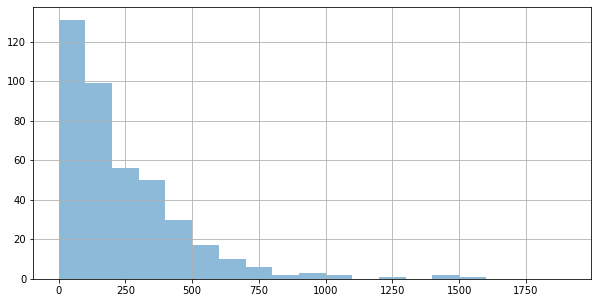

In [85]:
bins = np.arange(0, 2000, 100 )
ax1 = df.loc[df['reviews.rating'] == 1, "length_review"].hist(bins=bins, figsize=(10, 5), alpha = 0.5, label='Rating=1', grid = False) 

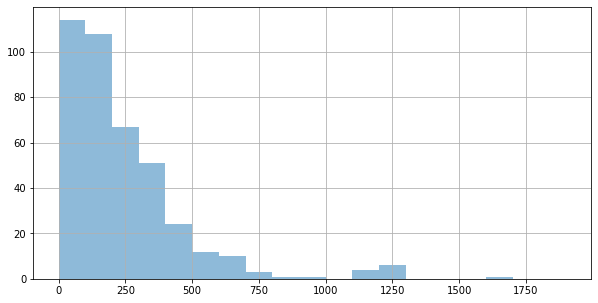

In [73]:
ax2 = df.loc[df['reviews.rating'] == 2, "length_review"].hist(bins=bins, figsize=(10, 5), alpha = 0.5 ) 

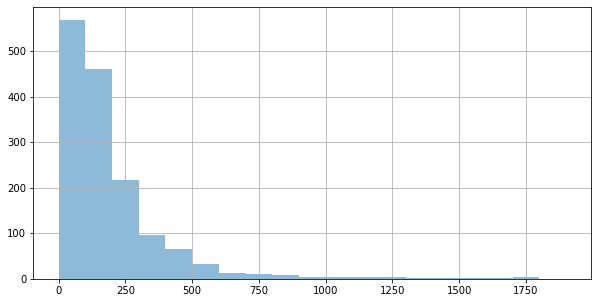

In [74]:
ax3 = df.loc[df['reviews.rating'] == 3, "length_review"].hist(bins=bins, figsize=(10, 5), alpha = 0.5 )

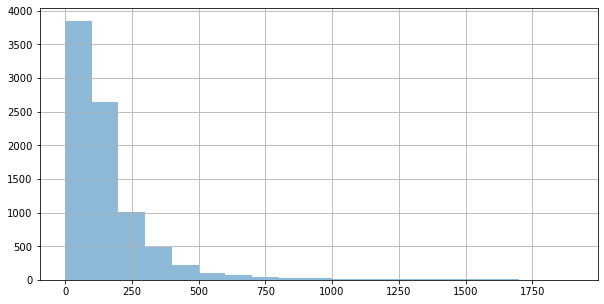

In [75]:
ax4 = df.loc[df['reviews.rating'] == 4, "length_review"].hist(bins=bins, figsize=(10, 5), alpha = 0.5 ) 

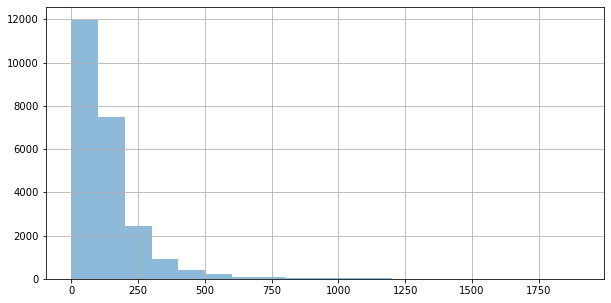

In [76]:
ax = df.loc[df['reviews.rating'] == 5, "length_review"].hist(bins=bins, figsize=(10, 5), alpha = 0.5 ) 

In [86]:
count = (df['length_review'] > 2000).sum()
count

23

In [93]:
df = df.drop( columns = [ 'id', 'name', 'keys', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs' ] )

KeyError: "['id', 'name', 'keys', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs'] not found in axis"

In [97]:
df = df.drop( columns = [ 'reviews.dateAdded', 'reviews.username' ] )
df

,asins,brand,categories,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,length_review,length_title
0,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,0.0,5.0,This product so far has not disappointed My ch...,Kindle,141,6
1,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,0.0,5.0,great for beginner or experienced person Bough...,very fast,74,9
2,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son,125,38
3,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,0.0,4.0,Ive had my Fire HD 8 two weeks now and I love ...,Good,584,4
4,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,606,25
...,...,...,...,...,...,...,...,...,...,...,...
34655,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...","Amazon Digital Services, Inc",NaN,NaN,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 18A charger,1120,49
34656,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...","Amazon Digital Services, Inc",NaN,NaN,1.0,Amazon should include this charger with the Ki...,Should be included,248,18
34657,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...","Amazon Digital Services, Inc",NaN,NaN,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,306,21
34658,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...","Amazon Digital Services, Inc",NaN,NaN,1.0,I was surprised to find it did not come with a...,Not worth the money,227,19


Text(0, 0.5, 'Ratings')

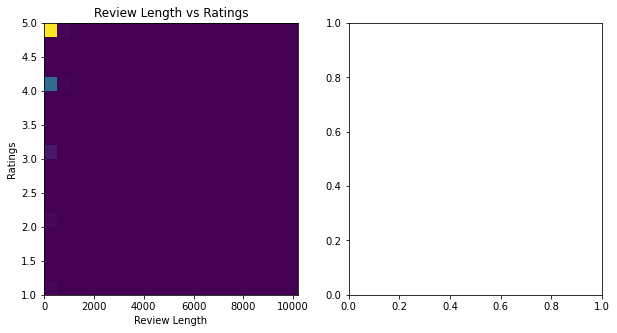

In [110]:
df_filtered = df[df['reviews.rating'].notna()]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist2d(df_filtered['length_review'], df_filtered['reviews.rating'], bins=20)
axs[0].set_title('Review Length vs Ratings')
axs[0].set_xlabel('Review Length')
axs[0].set_ylabel('Ratings')